<a href="https://colab.research.google.com/github/Miruthulla/PRODIGY_DS_TASK04/blob/main/TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
data = pd.read_csv('twitter_training.csv')
v_data = pd.read_csv('twitter_validation.csv')

In [9]:
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
15831,3108,Dota2,Negative,She wtf
15832,3108,Dota2,Negative,wtf
15833,3109,Dota2,Irrelevant,ICYMI: @BLASTDota finds sponsor in @KITKAT. . ...
15834,3109,Dota2,Irrelevant,ICYMI: @ BLASTDota finds sponsor in @ KITKAT. ...


In [8]:
v_data


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
data.columns = ['id', 'game', 'sentiment', 'text']
v_data.columns = ['id', 'game', 'sentiment', 'text']

In [11]:
data

,id,game,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
15831,3108,Dota2,Negative,She wtf
15832,3108,Dota2,Negative,wtf
15833,3109,Dota2,Irrelevant,ICYMI: @BLASTDota finds sponsor in @KITKAT. . ...
15834,3109,Dota2,Irrelevant,ICYMI: @ BLASTDota finds sponsor in @ KITKAT. ...


In [12]:
v_data

,id,game,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [13]:
data.shape

(15836, 4)

In [14]:
data.columns

Index(['id', 'game', 'sentiment', 'text'], dtype='object')

In [15]:
data.describe(include='all')

,id,game,sentiment,text
count,15836.000000,15836,15836,15675
unique,NaN,7,4,14815
top,NaN,CallOfDutyBlackopsColdWar,Negative,"At the same time, despite the fact that there ..."
freq,NaN,2376,4674,37
mean,5597.146123,NaN,NaN,NaN
std,4482.730790,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,1878.000000,NaN,NaN,NaN
50%,2958.000000,NaN,NaN,NaN
75%,9321.000000,NaN,NaN,NaN


In [16]:
id_types = data['id'].value_counts()
id_types

id
9361     6
13009    6
13011    6
13012    6
13013    6
        ..
112      6
113      6
3107     6
2401     5
3109     3
Name: count, Length: 2640, dtype: int64

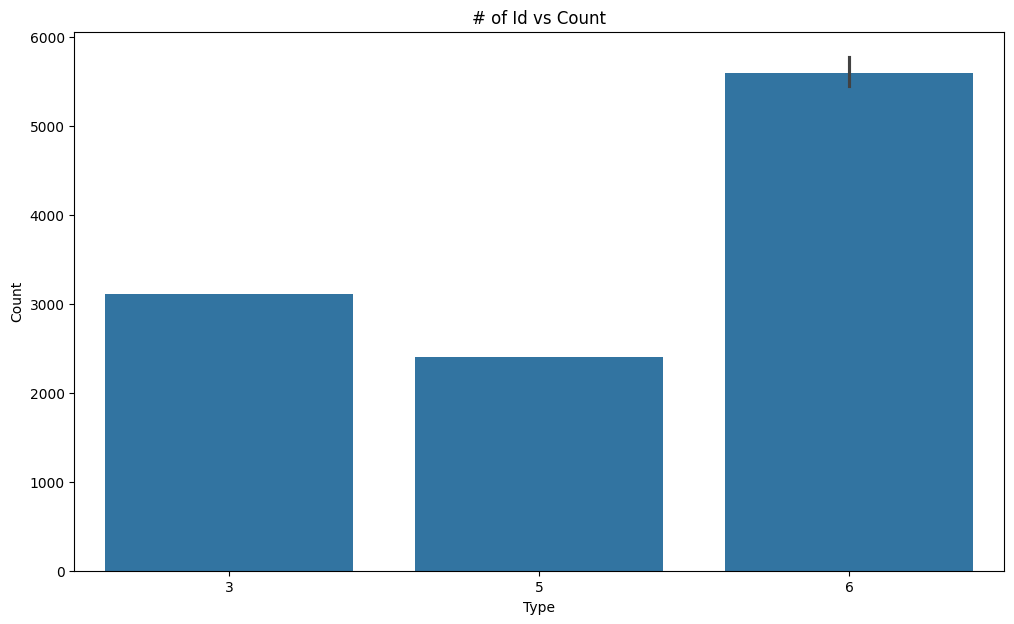

In [17]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of Id vs Count')
plt.show()

In [18]:
game_types = data['game'].value_counts()
game_types

game
CallOfDutyBlackopsColdWar    2376
NBA2K                        2352
Overwatch                    2334
Xbox(Xseries)                2334
Amazon                       2316
Borderlands                  2285
Dota2                        1839
Name: count, dtype: int64

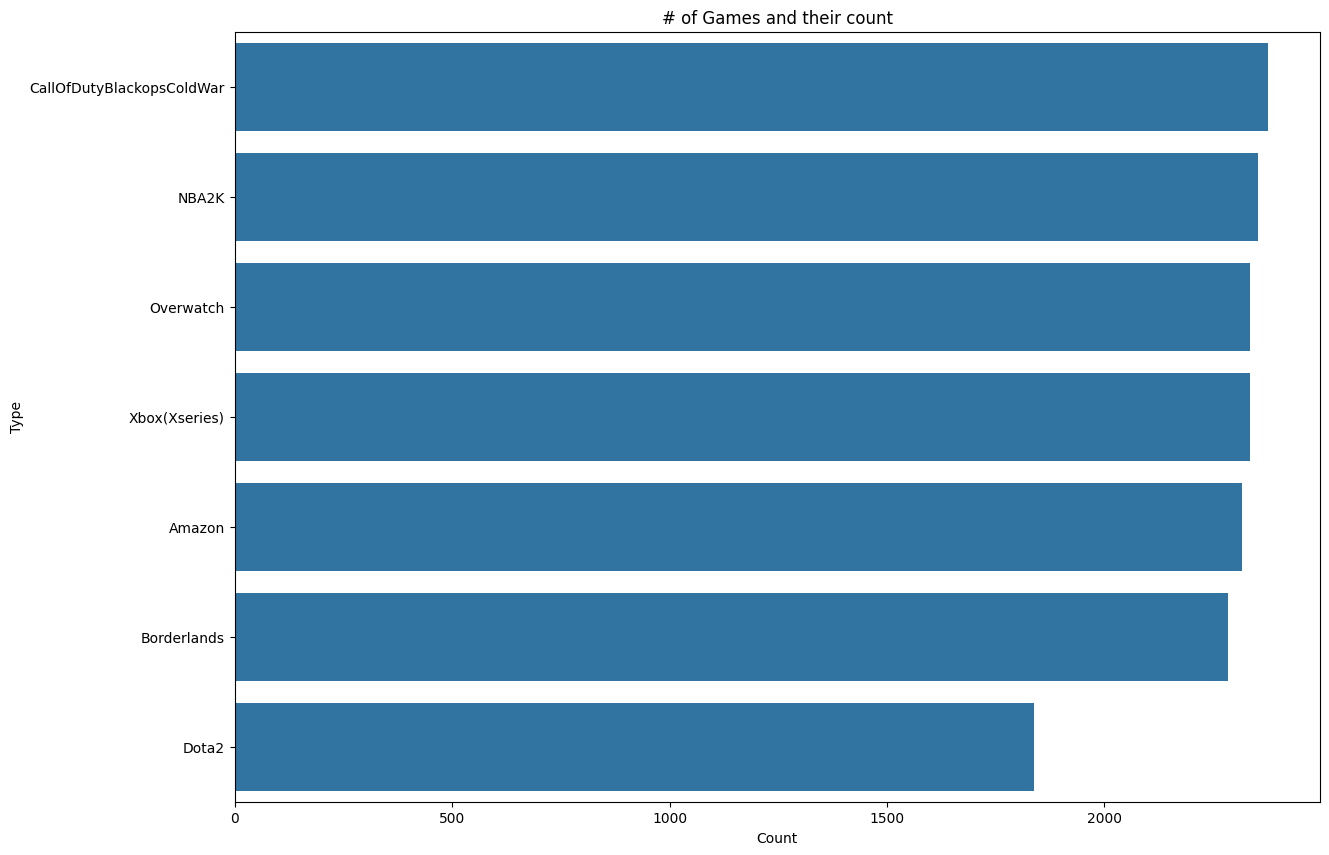

In [19]:
plt.figure(figsize=(14,10))

sns.barplot(x=game_types.values,y=game_types.index)
plt.title('# of Games and their count')
plt.ylabel('Type')
plt.xlabel('Count')

plt.show()

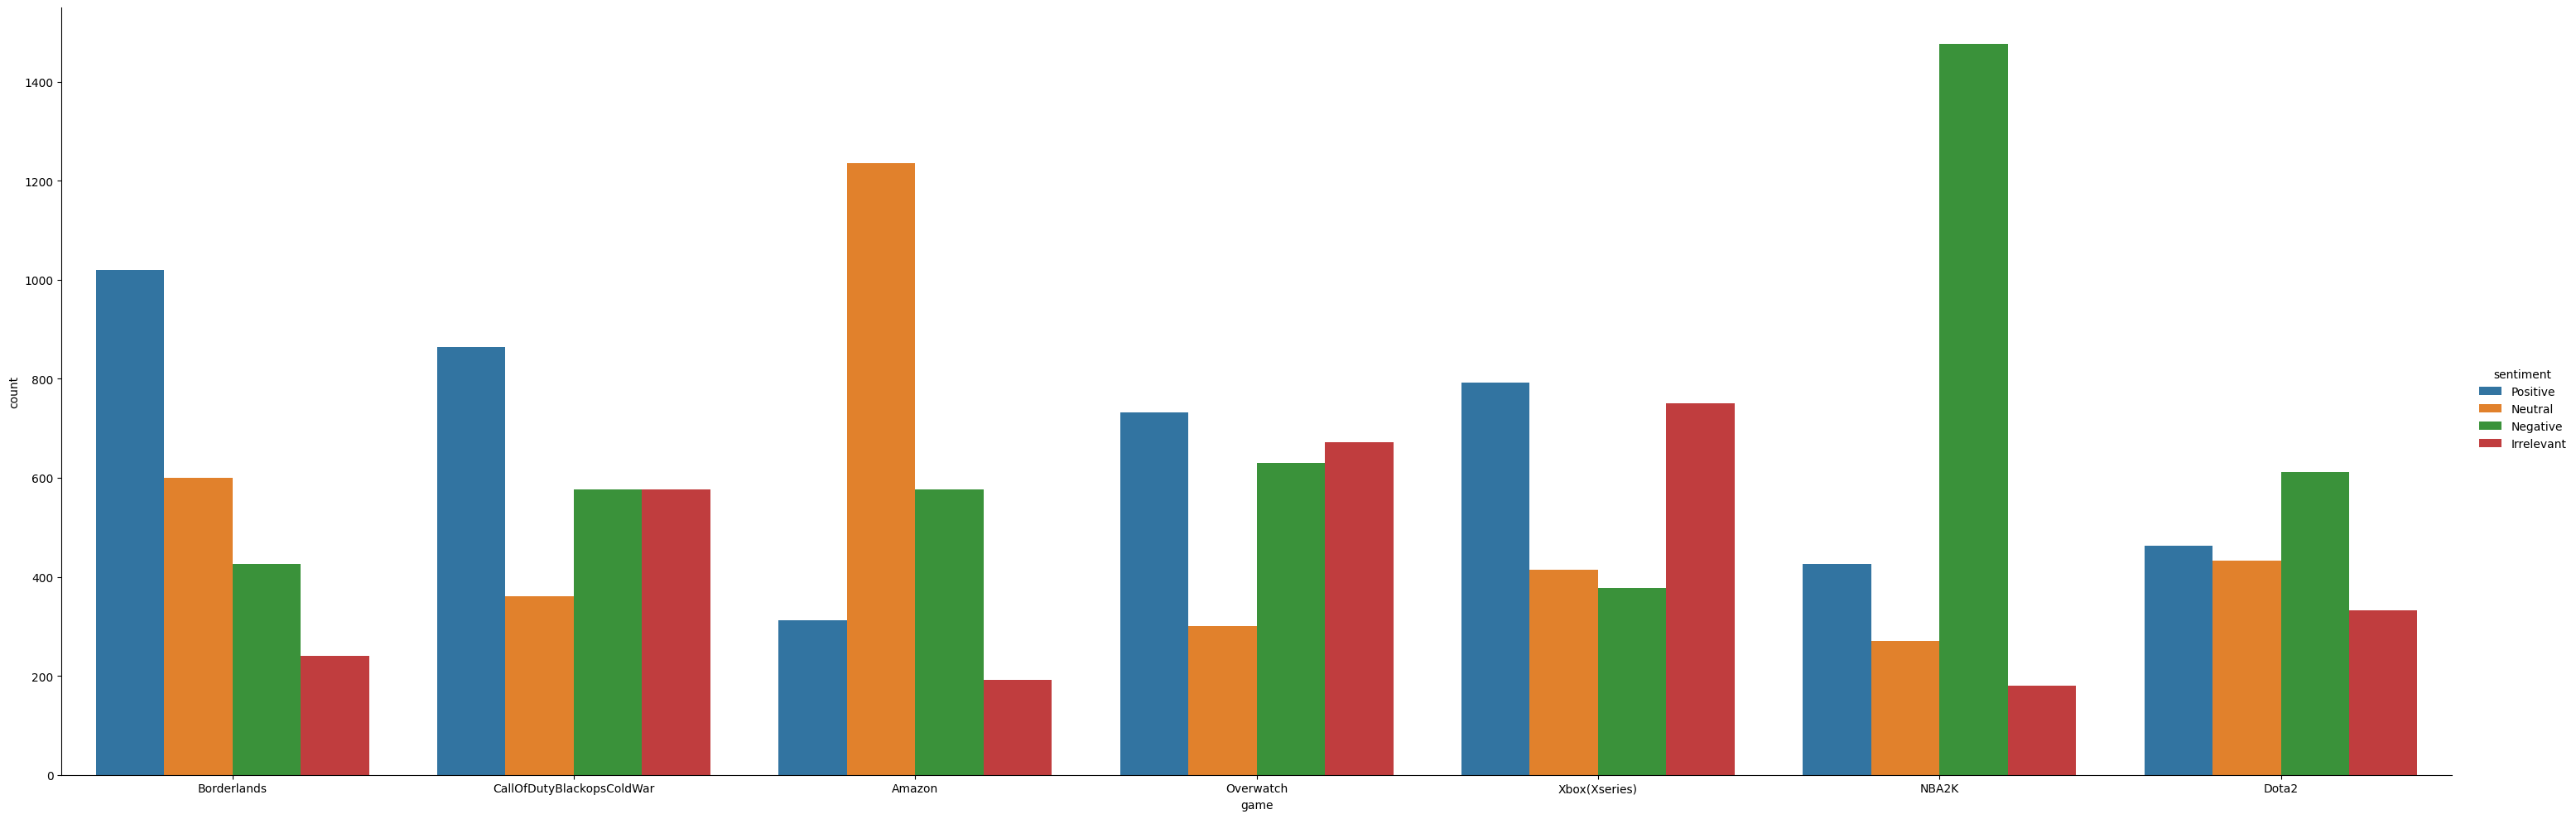

In [22]:
sns.catplot(x="game",hue="sentiment", kind="count",height=10,aspect=3, data=data)

<Axes: >

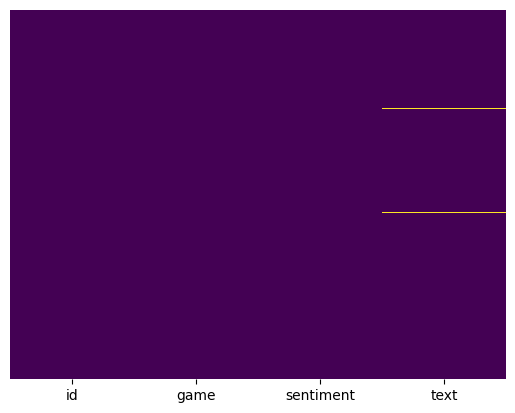

In [21]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  15836


,Total Missing,In Percent
text,161,1.02
id,0,0.00
game,0,0.00
sentiment,0,0.00


In [24]:
data.dropna(subset=['text'],inplace=True)

total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  15675


,Total Missing,In Percent
id,0,0.0
game,0,0.0
sentiment,0,0.0
text,0,0.0


In [25]:
train0=data[data['sentiment']=="Negative"]
train1=data[data['sentiment']=="Positive"]
train2=data[data['sentiment']=="Irrelevant"]
train3=data[data['sentiment']=="Neutral"]

In [27]:
train0.shape, train1.shape, train2.shape, train3.shape

((4648, 4), (4574, 4), (2888, 4), (3565, 4))

In [28]:
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]

In [29]:
train0.shape, train1.shape, train2.shape, train3.shape

((387, 4), (381, 4), (240, 4), (297, 4))

In [30]:
data=pd.concat([train0,train1,train2,train3],axis=0)
data

,id,game,sentiment,text
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
1044,2585,Borderlands,Neutral,Wonderful adorable photos.
1045,2585,Borderlands,Neutral,Amazing photos.
1046,2585,Borderlands,Neutral,Wonderful summer photos.
1047,2585,Borderlands,Neutral,of Wonderful entrancing photos.


In [31]:
id_types = data['id'].value_counts()
id_types

id
2405    6
2472    6
2494    6
2498    6
2500    6
       ..
2532    5
2411    5
2503    5
2496    5
2772    3
Name: count, Length: 219, dtype: int64

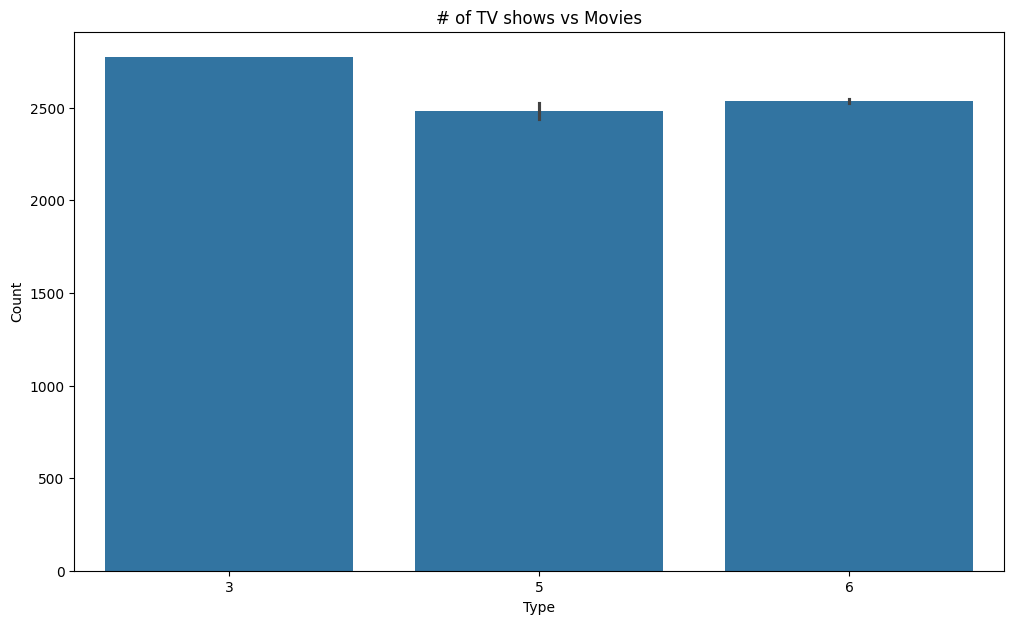

In [32]:
plt.figure(figsize=(12,7))
sns.barplot(x=id_types.values,y=id_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [33]:
game_types = data['game'].value_counts()
game_types

game
Borderlands    1305
Name: count, dtype: int64

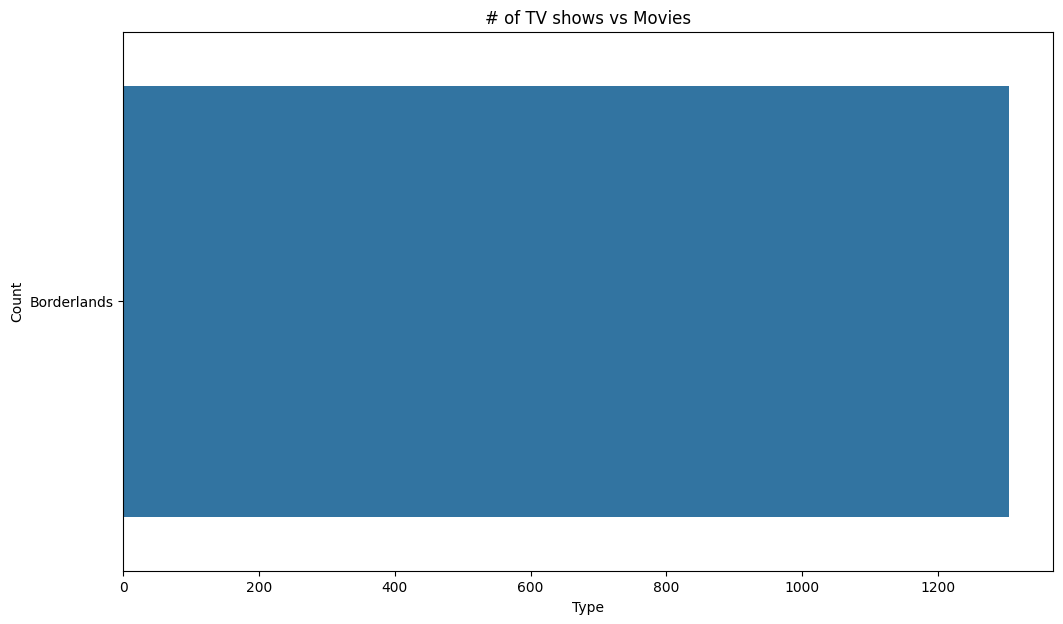

In [34]:
plt.figure(figsize=(12,7))
sns.barplot(x=game_types.values,y=game_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [35]:
sentiment_types = data['sentiment'].value_counts()
sentiment_types

sentiment
Negative      387
Positive      381
Neutral       297
Irrelevant    240
Name: count, dtype: int64

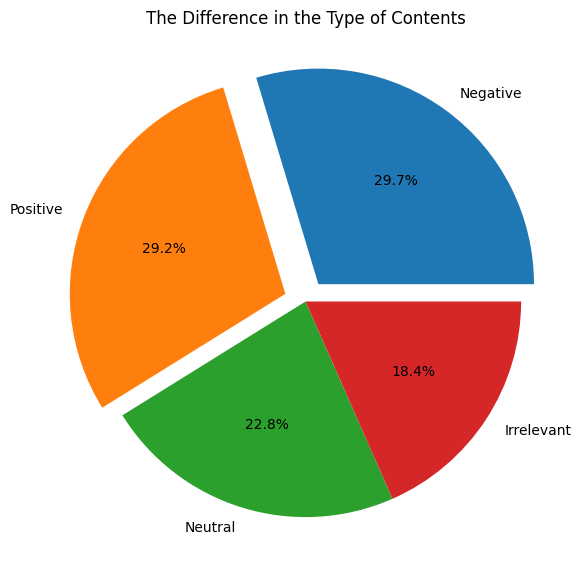

In [36]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

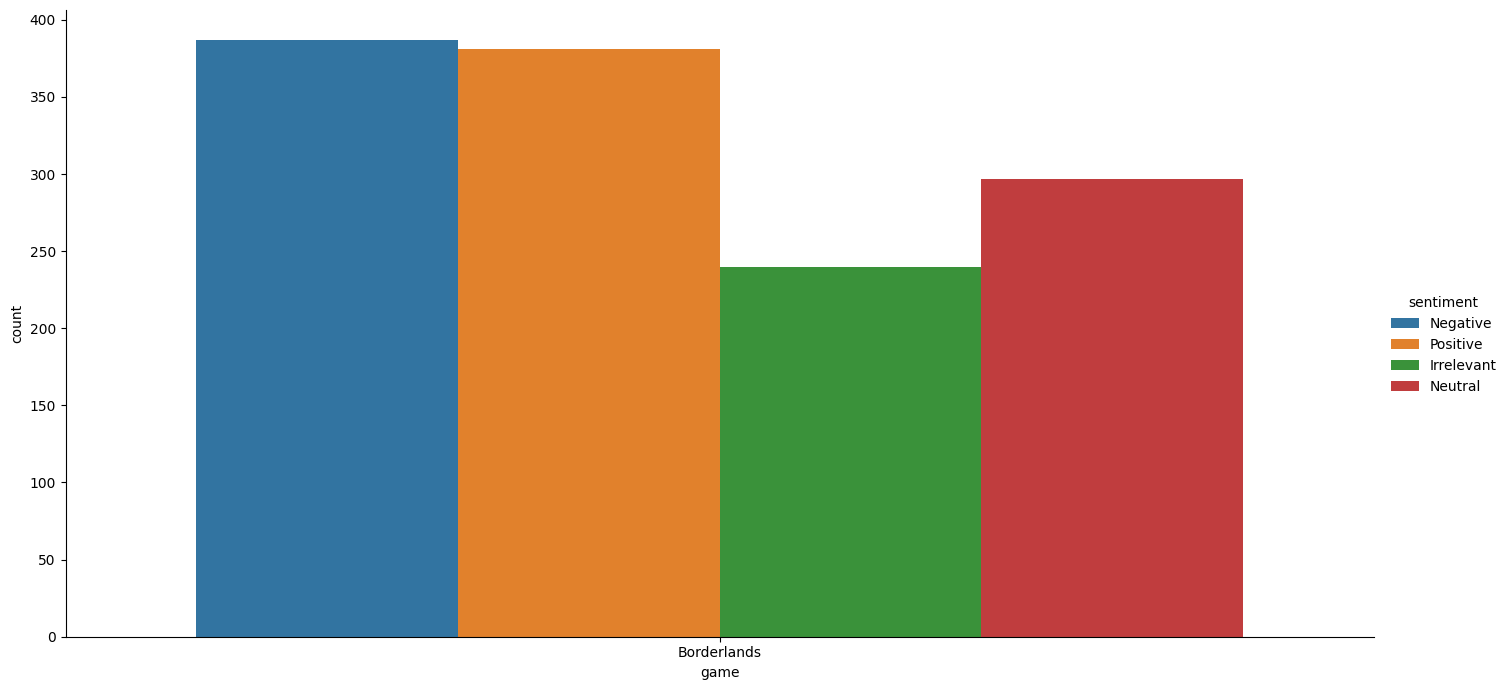

In [37]:
sns.catplot(x='game',hue='sentiment',kind='count',height=7,aspect=2,data=data)

In [38]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [39]:
data['sentiment']=label_encoder.fit_transform(data['sentiment'])
data['game']=label_encoder.fit_transform(data['game'])
v_data['sentiment']=label_encoder.fit_transform(v_data['sentiment'])
v_data['game']=label_encoder.fit_transform(v_data['game'])

In [40]:
data = data.drop(['id'],axis=1)

data

,game,sentiment,text
23,0,1,the biggest dissappoinment in my life came out...
24,0,1,The biggest disappointment of my life came a y...
25,0,1,The biggest disappointment of my life came a y...
26,0,1,the biggest dissappoinment in my life coming o...
27,0,1,For the biggest male dissappoinment in my life...
...,...,...,...
1044,0,2,Wonderful adorable photos.
1045,0,2,Amazing photos.
1046,0,2,Wonderful summer photos.
1047,0,2,of Wonderful entrancing photos.


In [41]:
data.nunique()

game            1
sentiment       4
text         1264
dtype: int64

In [42]:
v_data.nunique()

id           999
game          32
sentiment      4
text         998
dtype: int64